# Installations and Imports

In [ ]:
pip install monai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00


In [ ]:
import os
from glob import glob

import torch
from monai.transforms import (
    Compose,
    LoadImaged,
    ToTensord,
    AddChanneld,
    Spacingd,
    ScaleIntensityRanged,
    CropForegroundd,
    Resized,

)

from monai.data import Dataset, DataLoader
from monai.utils import first
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing

In [ ]:
data_dir = '/content/drive/MyDrive/dataset'

In [ ]:
train_images = sorted(glob(os.path.join(data_dir, 'train_image', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'train_label', '*.nii.gz')))

val_images = sorted(glob(os.path.join(data_dir, 'test_image', '*.nii.gz')))
val_labels = sorted(glob(os.path.join(data_dir, 'test_label', '*.nii.gz')))


In [ ]:
train_images

['/content/drive/MyDrive/dataset/train_image/liver_0_0.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_1_0.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_2_5.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_2_6.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_2_7.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_3_4.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_3_5.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_3_6.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_3_7.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_4_5.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_4_6.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_4_7.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_4_8.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_4_9.nii.gz',
 '/content/drive/MyDrive/dataset/train_image/liver_5_4.nii.gz',
 '/content/drive/MyDrive/dataset/train_i

In [ ]:
train_files = [{'image': image_name, 'label': label_name}
               for image_name, label_name in zip(train_images, train_labels)]

val_files = [{'image': image_name, 'label': label_name}
               for image_name, label_name in zip(val_images, val_labels)]

In [ ]:
train_files

[{'image': '/content/drive/MyDrive/dataset/train_image/liver_0_0.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_0_0.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_1_0.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_1_0.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_2_5.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_2_5.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_2_6.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_2_6.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_2_7.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_2_7.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_3_4.nii.gz',
  'label': '/content/drive/MyDrive/dataset/train_label/liver_3_4.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/train_image/liver_3_5.nii.gz',
  'label': '/content/drive/MyDri

In [ ]:
val_files

[{'image': '/content/drive/MyDrive/dataset/test_image/liver_9_5.nii.gz',
  'label': '/content/drive/MyDrive/dataset/test_label/liver_9_5.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/test_image/liver_9_6.nii.gz',
  'label': '/content/drive/MyDrive/dataset/test_label/liver_9_6.nii.gz'},
 {'image': '/content/drive/MyDrive/dataset/test_image/liver_9_7.nii.gz',
  'label': '/content/drive/MyDrive/dataset/test_label/liver_9_7.nii.gz'}]

In [ ]:
# transforms
orig_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),

        ToTensord(keys=['image', 'label'])
    ]
)


train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 2)),
        ScaleIntensityRanged(keys='image', a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=['image', 'label'], source_key='image'),
        Resized(keys=['image', 'label'], spatial_size=[128,128,128]),
        ToTensord(keys=['image', 'label'])
    ]
)


val_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.5, 1.5, 2)),
        ScaleIntensityRanged(keys='image', a_min=-200, a_max=200, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=['image', 'label'], source_key='image'),
        Resized(keys=['image', 'label'], spatial_size=[128,128,128]),
        ToTensord(keys=['image', 'label'])
    ]
)

/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)
/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:111: FutureWarning: <class 'monai.transforms.utility.dictionary.AddChanneld'>: Class `AddChanneld` has been deprecated since version 0.8. It will be removed in version 1.3. please use MetaTensor data type and monai.transforms.EnsureChannelFirstd instead with `channel_dim='no_channel'`.
  warn_deprecated(obj, msg, warning_category)
/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.transforms.utility.dictionary EnsureChannelFirstd.__init__:meta_keys: Argument `meta_keys` has been deprecated since version 0.9. not needed if ima

In [ ]:
orig_ds = Dataset(data=train_files, transform=orig_transforms)
orig_loader = DataLoader(orig_ds, batch_size=1)

train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1)

# Plotting an example after Preprocessing

In [ ]:
train_patient = first(train_loader)

In [ ]:
train_patient

{'image': metatensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           ...,
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ...

In [ ]:
orig_patient = first(orig_loader)
orig_patient

{'image': metatensor([[[[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            ...,
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]],
 
           [[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            ...,
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]],
 
           [[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
            [-1024., -1024., -1024.,  ..., -1024., -1024., -102

In [ ]:
test_patient = first(val_loader)
test_patient

{'image': metatensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           ...,
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ...

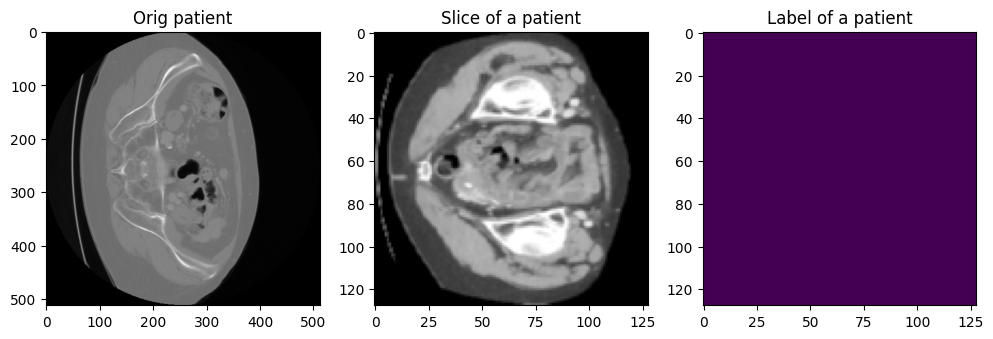

In [ ]:
plt.figure('train', (12, 6))

plt.subplot(1, 3, 1)
plt.title('Orig patient')
plt.imshow(orig_patient['image'][0, 0, : ,: ,30], cmap= "gray")

plt.subplot(1, 3, 2)
plt.title('Slice of a patient')
plt.imshow(train_patient['image'][0, 0, : ,: ,30], cmap= "gray")

plt.subplot(1,3,3)
plt.title('Label of a patient')
plt.imshow(train_patient['label'][0, 0, : ,: ,30])
plt.show()

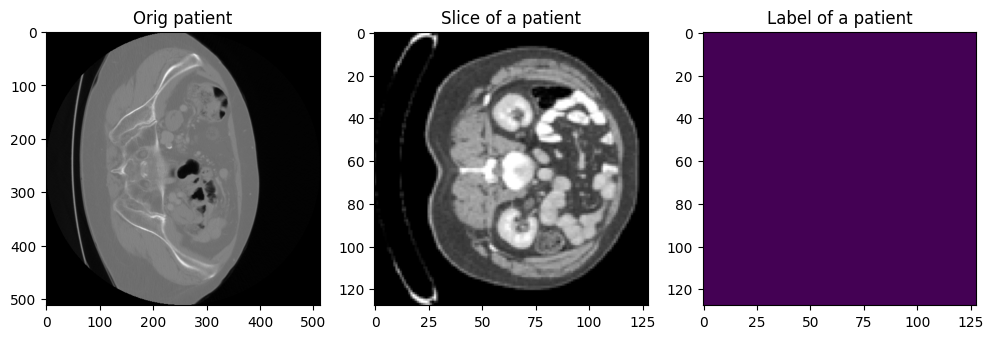

In [ ]:
plt.figure('test', (12, 6))

plt.subplot(1, 3, 1)
plt.title('Orig patient')
plt.imshow(orig_patient['image'][0, 0, : ,: ,30], cmap= "gray")

plt.subplot(1, 3, 2)
plt.title('Slice of a patient')
plt.imshow(test_patient['image'][0, 0, : ,: ,30], cmap= "gray")

plt.subplot(1,3,3)
plt.title('Label of a patient')
plt.imshow(test_patient['label'][0, 0, : ,: ,30])
plt.show()

Note:
The dimensions of the data represent batch size, channels, image height, image width, and image depth (slice number) in a 5D medical image volume.

**The second dimension represents the channels:** In some medical imaging data, we may have multiple channels of information. For example, in MRI data, we might have separate channels for different types of imaging (e.g., T1-weighted, T2-weighted). In this data, the second dimension also seems to have only one element, indicating a single channel.

# Dice Loss

## Dice coefficient
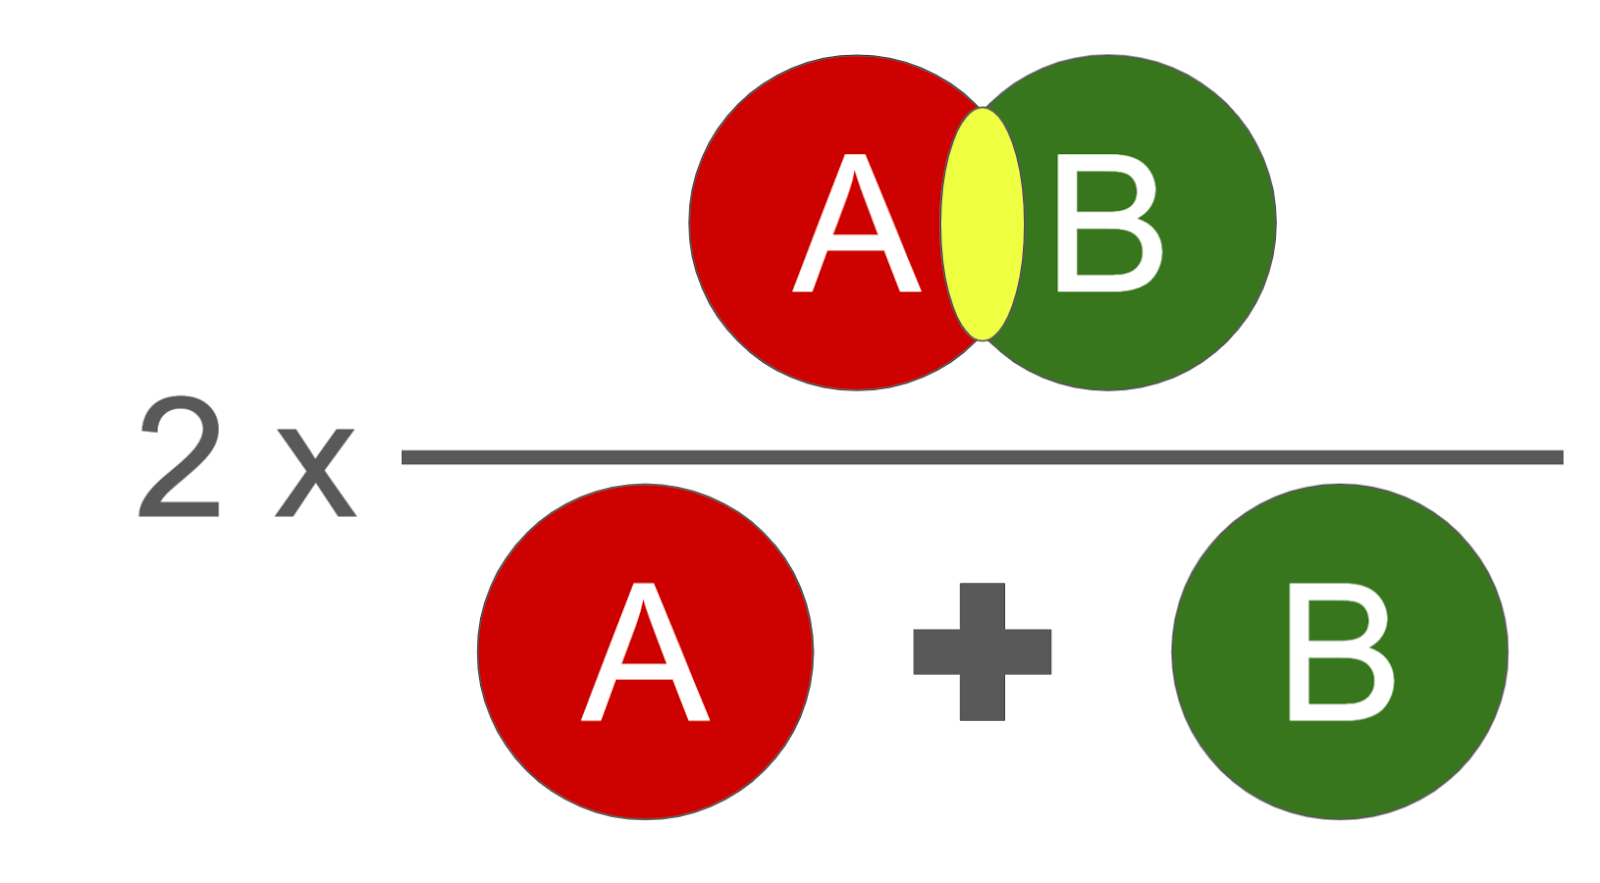

Dice coefficient -- Value between 0 and 1, nearer to 1 means that the model is predicting good results.

Thus,
Dice loss = 1 - dice coefficient

i.e better the prediction (Dice Coefficient), minimum the loss (Dice Loss).

In [ ]:
 from monai.losses import DiceLoss

 def dice_metric(predicted, target):
    '''
    In this function we take `predicted` and `target` (label) to calculate the dice coeficient then we use it
    to calculate a metric value for the training and the validation.
    '''
    dice_value = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
    value = 1 - dice_value(predicted, target).item()
    return value

# Model

In [ ]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(
    spatial_dims=3, # Indicates a 3D U-Net model
    in_channels=1,  # Indicates a 3D U-Net model
    out_channels=2, # Number of output channels (e.g., for segmentation tasks)
    channels=(16, 32, 64, 128, 256),  # Number of channels at each U-Net layer
    strides=(2, 2, 2, 2), # Spatial down-sampling strides
    num_res_units=2, # Number of residual units
    norm=Norm.BATCH).to(device) # Type of normalization (e.g., batch normalization)

print(model)

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


In [ ]:
from torchsummary import summary
summary(model, (1, 128, 128, 128)) # (input_channel, depth, height, width)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 16, 64, 64, 64]             448
            Conv3d-2       [-1, 16, 64, 64, 64]             448
       BatchNorm3d-3       [-1, 16, 64, 64, 64]              32
           Dropout-4       [-1, 16, 64, 64, 64]               0
             PReLU-5       [-1, 16, 64, 64, 64]               1
            Conv3d-6       [-1, 16, 64, 64, 64]           6,928
       BatchNorm3d-7       [-1, 16, 64, 64, 64]              32
           Dropout-8       [-1, 16, 64, 64, 64]               0
             PReLU-9       [-1, 16, 64, 64, 64]               1
     ResidualUnit-10       [-1, 16, 64, 64, 64]               0
           Conv3d-11       [-1, 32, 32, 32, 32]          13,856
           Conv3d-12       [-1, 32, 32, 32, 32]          13,856
      BatchNorm3d-13       [-1, 32, 32, 32, 32]              64
          Dropout-14       [-1, 32, 32,

# Training

In [ ]:
loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

In [ ]:
def train(model, loss, optim, max_epochs, model_dir, test_interval=1 , device=device):
    best_metric = -1
    best_metric_epoch = -1
    save_loss_train = []
    save_loss_test = []
    save_metric_train = []
    save_metric_test = []

    for epoch in range(max_epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        model.train()
        train_epoch_loss = 0
        train_step = 0
        epoch_metric_train = 0
        for batch_data in train_loader:

            train_step += 1

            volume = batch_data["image"]
            label = batch_data["label"]
            label = label != 0
            volume, label = (volume.to(device), label.to(device))

            optim.zero_grad()
            outputs = model(volume)

            train_loss = loss(outputs, label)

            train_loss.backward()
            optim.step()

            train_epoch_loss += train_loss.item()
            print(
                f"{train_step}/{len(train_loader) // train_loader.batch_size}, "
                f"Train_loss: {train_loss.item():.4f}")

            train_metric = dice_metric(outputs, label)
            epoch_metric_train += train_metric
            print(f'Train_dice: {train_metric:.4f}')

        print('-'*20)

        train_epoch_loss /= train_step
        print(f'Epoch_loss: {train_epoch_loss:.4f}')
        save_loss_train.append(train_epoch_loss)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)

        epoch_metric_train /= train_step
        print(f'Epoch_metric: {epoch_metric_train:.4f}')

        save_metric_train.append(epoch_metric_train)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)

        if (epoch + 1) % test_interval == 0:

            model.eval()
            with torch.no_grad():
                test_epoch_loss = 0
                test_metric = 0
                epoch_metric_test = 0
                test_step = 0

                for test_data in val_loader:

                    test_step += 1

                    test_volume = test_data["image"]
                    test_label = test_data["label"]
                    test_label = test_label != 0
                    test_volume, test_label = (test_volume.to(device), test_label.to(device),)

                    test_outputs = model(test_volume)

                    test_loss = loss(test_outputs, test_label)
                    test_epoch_loss += test_loss.item()
                    test_metric = dice_metric(test_outputs, test_label)
                    epoch_metric_test += test_metric


                test_epoch_loss /= test_step
                print(f'test_loss_epoch: {test_epoch_loss:.4f}')
                save_loss_test.append(test_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_test.npy'), save_loss_test)

                epoch_metric_test /= test_step
                print(f'test_dice_epoch: {epoch_metric_test:.4f}')
                save_metric_test.append(epoch_metric_test)
                np.save(os.path.join(model_dir, 'metric_test.npy'), save_metric_test)

                if epoch_metric_test > best_metric:
                    best_metric = epoch_metric_test
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(
                        model_dir, "best_metric_model.pth"))

                print(
                    f"current epoch: {epoch + 1} current mean dice: {test_metric:.4f}"
                    f"\nbest mean dice: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}"
                )


    print(
        f"train completed, best_metric: {best_metric:.4f} "
        f"at epoch: {best_metric_epoch}")

In [ ]:
model_dir = '/content/result'
train(model, loss_function, optimizer, 10, model_dir)

----------
epoch 1/10
1/28, Train_loss: 0.5279
Train_dice: 0.4721
2/28, Train_loss: 0.5318
Train_dice: 0.4682
3/28, Train_loss: 0.5191
Train_dice: 0.4809
4/28, Train_loss: 0.4090
Train_dice: 0.5910
5/28, Train_loss: 0.5285
Train_dice: 0.4715
6/28, Train_loss: 0.5688
Train_dice: 0.4312
7/28, Train_loss: 0.5120
Train_dice: 0.4880
8/28, Train_loss: 0.4232
Train_dice: 0.5768
9/28, Train_loss: 0.5335
Train_dice: 0.4665
10/28, Train_loss: 0.5601
Train_dice: 0.4399
11/28, Train_loss: 0.4757
Train_dice: 0.5243
12/28, Train_loss: 0.3804
Train_dice: 0.6196
13/28, Train_loss: 0.3954
Train_dice: 0.6046
14/28, Train_loss: 0.5578
Train_dice: 0.4422
15/28, Train_loss: 0.5721
Train_dice: 0.4279
16/28, Train_loss: 0.5189
Train_dice: 0.4811
17/28, Train_loss: 0.4409
Train_dice: 0.5591
18/28, Train_loss: 0.5201
Train_dice: 0.4799
19/28, Train_loss: 0.5700
Train_dice: 0.4300
20/28, Train_loss: 0.5026
Train_dice: 0.4974
21/28, Train_loss: 0.4382
Train_dice: 0.5618
22/28, Train_loss: 0.4858
Train_dice: 0.51